# **Data cleaning**

### Objectives
- Clean the .csv raw data from Kaggle

### Inputs
- This file uses insurance.csv data located in the data/raw.

### Outputs
- The file will save the cleaned data into data/cleaned folder.


## Load the libraries and the data

First we need to load pandas for data manipulation. We will also import matplotlib to check the data distribution when needed.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

The data will be loaded as the variable insurance:

In [110]:
insurance = pd.read_csv("../data/raw/insurance.csv")
print(insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Check for null entries

In [111]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As you can see, all data is filled and there are no null values.

### Look into the categorical data
Here I will look at different categorical variables in order to understand them better and to decide what to do with these variables in the data cleaning process.

In [112]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

We have 3 categorical variables: `sex`, `smoker` and `region`. Let's look at the unique variables for each category:

In [113]:
print(f"sex: {insurance['sex'].unique()}")
print(f"smoker: {insurance['smoker'].unique()}")
print(f"region: {insurance['region'].unique()}")

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


As a bonus we might also check the unique variables for `children`, since we expect these to be whole numbers with only several unique possibilities:

In [114]:
print(f"children: {insurance['children'].unique()}")

children: [0 1 3 2 5 4]


All of the categories have few options and none of them seem anomalous, therefore there is no need to combine any of them. However we might change `smoker` to boolean to make the data lighter for the memory.

## Data cleaning

### Change the data type of `smoker`
This feature would be more efficient if it was stored as boolean.

In [115]:
print(f"smoker: {insurance['smoker'].unique()}")

smoker: ['yes' 'no']


In [116]:
smoker_dict = {
    'yes': True,
    'no': False
}

insurance['smoker'].replace(to_replace=smoker_dict, inplace=True)

Now we check data types again to confirm the change:

In [117]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker         bool
region       object
charges     float64
dtype: object

### Categorize continuous data into bins
For the ease of visualization categorical data might be grouped into several bins or categories:
- Age could be split into age brackets.
- BMI is usually split into the following categories: underweight (BMI less than 18.5), normal weight (18.5 to 24.9), overweight (25 to 29.9), and obesity (30 or more).

It is important to make sure that each category has roughly the same amount of data, while also making categories reasonable.

#### Age categorization

Let's first check the maximum and minimum value of age:

In [118]:
print(f"minimum age: {insurance['age'].min()}")
print(f"maximum age: {insurance['age'].max()}")

minimum age: 18
maximum age: 64


We will try to split the age into 5 categories. We will go with:
- 18-25
- 26-35
- 36-45
- 46-55
- 56-64

Now we will categorize age into bins:

In [119]:
def age_categorization(age):
    if age < 26:
        return "18-25"
    elif age < 36:
        return "26-35"
    elif age < 46:
        return "36-45"
    elif age < 56:
        return "46-55"
    else:
        return "56+"

insurance['age_bracket'] = insurance['age'].apply(age_categorization)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_bracket
0,19,female,27.900,0,True,southwest,16884.92400,18-25
1,18,male,33.770,1,False,southeast,1725.55230,18-25
2,28,male,33.000,3,False,southeast,4449.46200,26-35
3,33,male,22.705,0,False,northwest,21984.47061,26-35
4,32,male,28.880,0,False,northwest,3866.85520,26-35


Let's look at the `age_bracket` categories to see if the bins have a reasonable distribution:

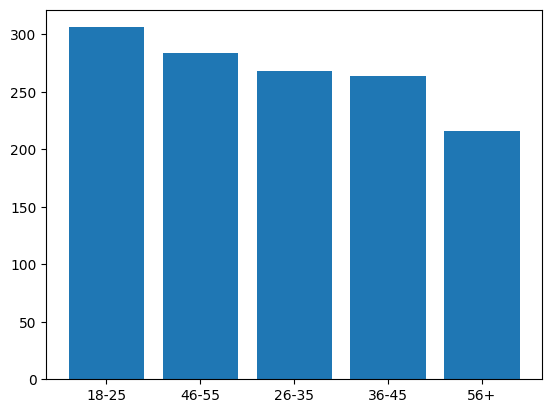

In [120]:
plt.bar(x=insurance['age_bracket'].value_counts().index, height=insurance['age_bracket'].value_counts())
plt.show()

Although not perfect, since categories are not equal, the distribution seem to be acceptable.

#### BMI categorization
We will split the BMI into the aforementioned categories:

In [121]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi < 25:
        return "normal"
    elif bmi < 30:
        return "overweight"
    else:
        return "obesity"

insurance['bmi_category'] = insurance['bmi'].apply(bmi_category)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_bracket,bmi_category
0,19,female,27.900,0,True,southwest,16884.92400,18-25,overweight
1,18,male,33.770,1,False,southeast,1725.55230,18-25,obesity
2,28,male,33.000,3,False,southeast,4449.46200,26-35,obesity
3,33,male,22.705,0,False,northwest,21984.47061,26-35,normal
4,32,male,28.880,0,False,northwest,3866.85520,26-35,overweight


Let's check the distribution of BMI:

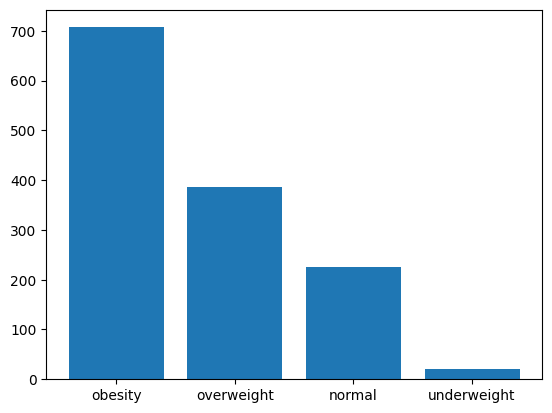

In [122]:
plt.bar(x=insurance['bmi_category'].value_counts().index, height=insurance['bmi_category'].value_counts())
plt.show()

Not the best distribution, however this is the official classification of BMI. Obesity could technically be split into several categories, however that would create to many variables for a meaningful analysis if we do that.

## Save the cleaned data
The data will be saved in the `data/cleaned` folder as a `.csv` file. We need to make sure that index is set to `False` to avoid duplicate index when the file is read in the future:

In [123]:
insurance.to_csv("../data/cleaned/insurance_cleaned.csv", index=False)

Let's read it to make sure everything is saved as intended:

In [124]:
insurance = pd.read_csv("../data/cleaned/insurance_cleaned.csv")
print(insurance.shape)
insurance.head()

(1338, 9)


,age,sex,bmi,children,smoker,region,charges,age_bracket,bmi_category
0,19,female,27.900,0,True,southwest,16884.92400,18-25,overweight
1,18,male,33.770,1,False,southeast,1725.55230,18-25,obesity
2,28,male,33.000,3,False,southeast,4449.46200,26-35,obesity
3,33,male,22.705,0,False,northwest,21984.47061,26-35,normal
4,32,male,28.880,0,False,northwest,3866.85520,26-35,overweight
